In [4]:
import torch
import torch.nn as nn
import argparse
import wandb
from datasets import load_dataset
from data import augment, generate_masks
from tqdm import tqdm
from models import *
import os

from models import *
from data import *
from train import *

import matplotlib.pyplot as plt
import numpy as np

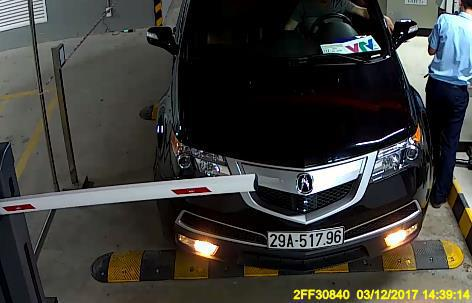

In [6]:
ds['test'][0]['image']

In [18]:
batch = augment(ds['test'][0:1])
masks = generate_masks(batch)

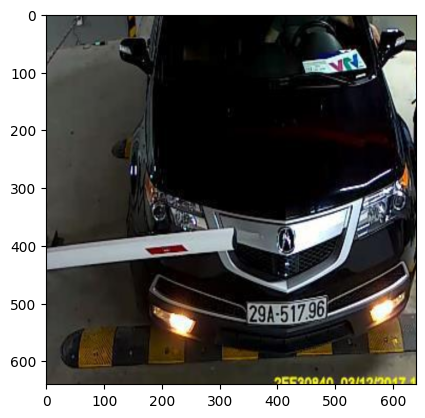

In [19]:
plt.imshow(np.asarray(batch[0][0].permute(1,2,0)))

In [28]:
device = torch.device('cpu')
model = nn.DataParallel(BaselineModel()).to(device)
model.load_state_dict(torch.load('out/model-baseline-0.pt', map_location=device))
model = model.module

In [26]:
images = torch.stack([img for img, _ in batch]).to(device)
masks = torch.stack(masks).to(device)

TypeError: stack(): argument 'tensors' (position 1) must be tuple of Tensors, not Tensor

In [33]:
model(images).argmax(dim=1).sum()

tensor(0)